In [1]:
import pandas as pd

In [3]:
# Load the uploaded Excel files
data_2021 = pd.read_excel('Bangalore Schools 2021.xlsx')
data_2020 = pd.read_excel('Bangalore Schools 2020.xlsx')
data_2019 = pd.read_excel('Bangalore Schools 2019.xlsx')

In [7]:
# Combine all datasets
combined_data = pd.concat([data_2020, data_2021, data_2019], ignore_index=True)

In [8]:
# Check the combined data
combined_data.head()

,Student Roll,Student Name,Hindi,English,Mathematics,Physics,Chemistry,Biology,History,Geography,Civics,Computer Science,Physical Education
0,1001,Akash Ahuja,39,74,87,92,84,36,47,82,44,81,78
1,1002,Mohit Srivatsav,72,38,97,53,28,77,36,76,74,68,81
2,1003,Anshika Mehra,82,52,94,81,88,100,45,37,10,36,69
3,1004,Visakha Tamboli,44,68,62,78,45,61,16,89,52,37,45
4,1005,Raju Deshmukh,83,49,44,62,68,99,70,61,65,82,39


Steps:
->Load Data: Ensure you’ve loaded all the datasets for the years 2019, 2020, and 2021.
->Calculate Total Marks for Each Student: Sum up the marks for all subjects for each student in each year.
->Cumulative Marks Calculation: Calculate the cumulative marks for each student across the years.
->Sort and Find Top Performer: Sort students based on cumulative marks and identify the top performer.

In [11]:
# Define the list of subject columns
subject_columns = ['Hindi', 'English', 'Mathematics', 'Physics', 'Chemistry', 
                   'Biology', 'History', 'Geography', 'Civics', 
                   'Computer Science', 'Physical Education']

1) Reward the top performer (student) of each school based on cumulative marks scored in last three years for all the subjects

In [12]:
# Calculate total marks for each student in each year
combined_data['Total Marks'] = combined_data[subject_columns].sum(axis=1)

In [13]:
# Group by 'Student Roll' and 'Year' to calculate total marks per year
# Then group by 'Student Roll' to get cumulative marks across years
cumulative_marks = combined_data.groupby(['Student Roll', 'Student Name'])['Total Marks'].sum().reset_index()

In [14]:
# Sort the data based on cumulative marks to find the top performer
top_performer = cumulative_marks.sort_values(by='Total Marks', ascending=False).head(1)

In [15]:
print("Top performer based on cumulative marks:")
print(top_performer)

Top performer based on cumulative marks:
    Student Roll  Student Name  Total Marks
19          1020  Nisha Saxena         2320


2) Rank each student within their own school based on their total marks scored in the year 2020 and compare the marks of Rank 10 for each school by arranging them in descending order

Steps
->Filter Data for the Year 2020: Extract data for students only in the year 2020.
->Calculate Total Marks for Each Student in 2020: Sum up the marks for all subjects in 2020.
->Rank the Students within Each School: Rank the students based on their total marks in descending order within each school.
->Extract and Compare Rank 10: Identify the marks for Rank 10 from each school and compare them.

In [ ]:
# Filter data for the year 2020
data_2020 = combined_data[combined_data['Year'] == 2020]

In [16]:
# Calculate total marks for each student in 2020
data_2020['Total Marks 2020'] = data_2020[subject_columns].sum(axis=1)

In [24]:
# Rank students based on their total marks in descending order
data_2020['Rank'] = data_2020['Total Marks 2020'].rank(ascending=False, method='min')

In [25]:
# Extract Rank 10 students
rank_10_data = data_2020[data_2020['Rank'] == 10]

In [26]:
# Compare the marks of Rank 10 students across the entire dataset, sorted by total marks
rank_10_comparison = rank_10_data[['Student Name', 'Total Marks 2020']].sort_values(by='Total Marks 2020', ascending=False)

In [27]:
# Display the result
print(rank_10_comparison)

     Student Name  Total Marks 2020
11  Ganesh Sekhar               705


3) Find out students with the highest improvement for each subject from 2019-21 combining all the schools together

Steps:
-> Filter the Data for Years 2019, 2020, and 2021: We need the data for these three years to calculate the improvement.
-> Calculate Improvement for Each Subject: For each student, calculate the improvement in each subject from 2019 to 2021. Improvement is calculated as the difference between the marks in 2021 and 2019.
-> Identify the Highest Improvement for Each Subject: Identify the student with the highest improvement for each subject.
-> Return Results: Present the students with the highest improvement in each subject.

In [29]:
print(combined_data.columns)


Index(['Student Roll', 'Student Name', 'Hindi', 'English', 'Mathematics',
       'Physics', 'Chemistry', 'Biology', 'History', 'Geography', 'Civics',
       'Computer Science', 'Physical Education', 'Total Marks'],
      dtype='object')


In [36]:
# Add a 'Year' column to each DataFrame
data_2019['Year'] = 2019
data_2020['Year'] = 2020
data_2021['Year'] = 2021

In [37]:
# Combine the data for 2019, 2020, and 2021
combined_data = pd.concat([data_2019, data_2020, data_2021], ignore_index=True)

In [46]:
# Melt the DataFrame to have a row per student, subject, and year with marks
subjects = ['Hindi', 'English', 'Mathematics', 'Physics', 'Chemistry', 'Biology', 'History', 'Geography', 'Civics', 'Computer Science', 'Physical Education']
combined_data_melted = pd.melt(combined_data, id_vars=['Student Roll', 'Student Name', 'Year'], value_vars=subjects, 
                               var_name='Subject', value_name='Marks')

In [47]:
# Now pivot the data to have one row per student, with columns for each subject and year
pivot_data = combined_data_melted.pivot_table(index=['Student Roll', 'Student Name'], 
                                              columns=['Year', 'Subject'], 
                                              values='Marks', aggfunc='first')


In [50]:
# Check the MultiIndex columns structure of the pivot_data
print(pivot_data.columns)

MultiIndex([(2019,            'Biology'),
            (2019,          'Chemistry'),
            (2019,             'Civics'),
            (2019,   'Computer Science'),
            (2019,            'English'),
            (2019,          'Geography'),
            (2019,              'Hindi'),
            (2019,            'History'),
            (2019,        'Mathematics'),
            (2019, 'Physical Education'),
            (2019,            'Physics'),
            (2020,            'Biology'),
            (2020,          'Chemistry'),
            (2020,             'Civics'),
            (2020,   'Computer Science'),
            (2020,            'English'),
            (2020,          'Geography'),
            (2020,              'Hindi'),
            (2020,            'History'),
            (2020,        'Mathematics'),
            (2020, 'Physical Education'),
            (2020,            'Physics'),
            (2021,            'Biology'),
            (2021,          'Chemi

In [51]:
# Calculate improvement for each subject: (2021 marks - 2019 marks)
improvement_data = pivot_data.xs(2021, level=0, axis=1) - pivot_data.xs(2019, level=0, axis=1)

In [52]:
# Now, let's find the student with the highest improvement for each subject
highest_improvement = improvement_data.max()  # Max improvement for each subject

In [53]:
# Find the students who had the highest improvement
students_highest_improvement = improvement_data.idxmax()


In [55]:
# Combine the results into a DataFrame for easier viewing
result = pd.DataFrame({
    'Subject': improvement_data.columns,
    'Student with Highest Improvement': students_highest_improvement,
    'Improvement Value': highest_improvement
})

# Display the results
print(result)

                               Subject Student with Highest Improvement  \
Subject                                                                   
Biology                        Biology           (1011, Sonal Tripathi)   
Chemistry                    Chemistry          (1002, Mohit Srivatsav)   
Civics                          Civics     (1018, Sanjana Venkatramana)   
Computer Science      Computer Science             (1017, Rashmi Desai)   
English                        English          (1010, Subhajeet Dutta)   
Geography                    Geography          (1010, Subhajeet Dutta)   
Hindi                            Hindi           (1011, Sonal Tripathi)   
History                        History             (1014, Albert Pinto)   
Mathematics                Mathematics                (1016, Md. Yusuf)   
Physical Education  Physical Education           (1008, Anamika Kumari)   
Physics                        Physics            (1013, Praddep Meena)   

                    Impr

4) Identify best school for Arts, Science and Commerce streams based on marks scored by students in respective subjects for those streams in last three years

In [56]:
# Assuming 'data' is the combined data for all the years (2019, 2020, 2021) and all subjects

In [58]:
# Define the subjects for each stream
arts_subjects = ['Hindi', 'English', 'History', 'Geography', 'Civics']
science_subjects = ['Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer Science']
commerce_subjects = ['Hindi', 'English', 'Mathematics', 'Computer Science', 'Physical Education']


In [68]:
# Group by stream (Arts, Science, Commerce) and calculate the average marks per student
arts_data = combined_data[['Student Name', 'Hindi', 'English', 'History', 'Geography', 'Civics']].copy()
arts_data['Average Arts'] = arts_data[['Hindi', 'English', 'History', 'Geography', 'Civics']].mean(axis=1)

science_data = combined_data[['Student Name', 'Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer Science']].copy()
science_data['Average Science'] = science_data[['Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer Science']].mean(axis=1)

commerce_data = combined_data[['Student Name', 'Hindi', 'English', 'Mathematics', 'Computer Science', 'Physical Education']].copy()
commerce_data['Average Commerce'] = commerce_data[['Hindi', 'English', 'Mathematics', 'Computer Science', 'Physical Education']].mean(axis=1)


In [69]:
# Filter the data for each stream
arts_data = combined_data[arts_subjects]
science_data = combined_data[science_subjects]
commerce_data = combined_data[commerce_subjects]

In [71]:
# Calculate average marks for each student in each stream using .loc
combined_data.loc[:, 'Average Arts'] = arts_data.mean(axis=1)
combined_data.loc[:, 'Average Science'] = science_data.mean(axis=1)
combined_data.loc[:, 'Average Commerce'] = commerce_data.mean(axis=1)

In [73]:
# Identify the best student in each stream (highest average score)
best_arts_student = combined_data.loc[combined_data['Average Arts'].idxmax()]
best_science_student = combined_data.loc[combined_data['Average Science'].idxmax()]
best_commerce_student = combined_data.loc[combined_data['Average Commerce'].idxmax()]

# Print the best students in each stream
print(f"Best Student in Arts: {best_arts_student['Student Name']} with average marks {best_arts_student['Average Arts']}")
print(f"Best Student in Science: {best_science_student['Student Name']} with average marks {best_science_student['Average Science']}")
print(f"Best Student in Commerce: {best_commerce_student['Student Name']} with average marks {best_commerce_student['Average Commerce']}")


Best Student in Arts: Nisha Saxena with average marks 78.2
Best Student in Science: Anamika Kumari with average marks 88.8
Best Student in Commerce: Ganesh Sekhar with average marks 84.2


5. If the marks obtained for each subject can be categorised under 5 sections like below:
    
          <=20 - Very Poor
    
    >20 - <=40 - Poor
    
    >40 - <=60 - Average
    
    >60 - <=80 - Good
    
    >80 - <=100 - Very Good
    

Then calculate for each school how many students were in each category based on the avg. marks obtained each year

In [75]:
def categorize_marks(avg_marks):
    if avg_marks <= 20:
        return 'Very Poor'
    elif 20 < avg_marks <= 40:
        return 'Poor'
    elif 40 < avg_marks <= 60:
        return 'Average'
    elif 60 < avg_marks <= 80:
        return 'Good'
    else:
        return 'Very Good'


In [76]:
# Apply categorization function for each year
combined_data['Category 2019'] = combined_data['Average Arts']  # Or 'Average Science' or 'Average Commerce' as needed
combined_data['Category 2020'] = combined_data['Average Arts']  # Repeat for each relevant stream or year
combined_data['Category 2021'] = combined_data['Average Arts']  # Same here


In [77]:
# Count the number of students in each category for each year
category_counts_2019 = combined_data['Category 2019'].value_counts()
category_counts_2020 = combined_data['Category 2020'].value_counts()
category_counts_2021 = combined_data['Category 2021'].value_counts()

# Display the counts for each year
print("Category counts for 2019:")
print(category_counts_2019)
print("\nCategory counts for 2020:")
print(category_counts_2020)
print("\nCategory counts for 2021:")
print(category_counts_2021)


Category counts for 2019:
Category 2019
68.4    3
69.2    3
57.4    2
47.8    2
53.8    2
65.8    2
59.2    2
71.6    2
47.0    1
66.8    1
56.8    1
50.0    1
72.8    1
63.6    1
54.4    1
62.2    1
59.6    1
76.8    1
71.4    1
47.6    1
59.0    1
60.2    1
76.4    1
62.4    1
44.8    1
50.4    1
64.4    1
64.6    1
43.4    1
51.2    1
50.2    1
49.0    1
54.0    1
61.0    1
60.6    1
49.2    1
69.4    1
38.4    1
65.2    1
44.6    1
70.6    1
63.8    1
45.4    1
78.2    1
57.2    1
45.2    1
65.6    1
55.0    1
52.8    1
69.0    1
Name: count, dtype: int64

Category counts for 2020:
Category 2020
68.4    3
69.2    3
57.4    2
47.8    2
53.8    2
65.8    2
59.2    2
71.6    2
47.0    1
66.8    1
56.8    1
50.0    1
72.8    1
63.6    1
54.4    1
62.2    1
59.6    1
76.8    1
71.4    1
47.6    1
59.0    1
60.2    1
76.4    1
62.4    1
44.8    1
50.4    1
64.4    1
64.6    1
43.4    1
51.2    1
50.2    1
49.0    1
54.0    1
61.0    1
60.6    1
49.2    1
69.4    1
38.4    1
65.2    1
44.

6)  Which is the best school for each year 2019, 2020 and 2021 based on highest no. of students in Good and Very Good category

In [97]:
def categorize_marks_good_very_good(avg_marks):
    if 60 < avg_marks <= 80:
        return 'Good'
    elif 80 < avg_marks <= 100:
        return 'Very Good'
    else:
        return None  # For other categories, we don't need to count them

# Apply categorization for each year (2019, 2020, 2021) based on average marks
combined_data['Category 2019'] = combined_data['Average 2019'].apply(categorize_marks_good_very_good)
combined_data['Category 2020'] = combined_data['Average 2020'].apply(categorize_marks_good_very_good)
combined_data['Category 2021'] = combined_data['Average 2021'].apply(categorize_marks_good_very_good)

# Group by 'Student Roll' and count how many students are in the "Good" and "Very Good" categories
good_very_good_counts_2019 = combined_data[combined_data['Category 2019'].isin(['Good', 'Very Good'])] \
    .groupby('Student Roll')['Category 2019'] \
    .count()

good_very_good_counts_2020 = combined_data[combined_data['Category 2020'].isin(['Good', 'Very Good'])] \
    .groupby('Student Roll')['Category 2020'] \
    .count()

good_very_good_counts_2021 = combined_data[combined_data['Category 2021'].isin(['Good', 'Very Good'])] \
    .groupby('Student Roll')['Category 2021'] \
    .count()

# Check if there are students in the "Good" and "Very Good" categories for each year
def get_best_student(good_very_good_counts):
    if good_very_good_counts.empty:
        return None, 0  # If no data, return None and 0 count
    best_student = good_very_good_counts.idxmax()  # Get the student with the highest count
    best_student_count = good_very_good_counts.max()  # Get the count of students in Good/Very Good category
    return best_student, best_student_count

# Find the best students for each year
best_student_2019, best_student_count_2019 = get_best_student(good_very_good_counts_2019)
best_student_2020, best_student_count_2020 = get_best_student(good_very_good_counts_2020)
best_student_2021, best_student_count_2021 = get_best_student(good_very_good_counts_2021)

# Output the results
if best_student_2019:
    print(f"Best Student in 2019: {best_student_2019} with {best_student_count_2019} students in Good/Very Good category")
else:
    print("No students in Good/Very Good category for 2019")

if best_student_2020:
    print(f"Best Student in 2020: {best_student_2020} with {best_student_count_2020} students in Good/Very Good category")
else:
    print("No students in Good/Very Good category for 2020")

if best_student_2021:
    print(f"Best Student in 2021: {best_student_2021} with {best_student_count_2021} students in Good/Very Good category")
else:
    print("No students in Good/Very Good category for 2021")



No students in Good/Very Good category for 2019
No students in Good/Very Good category for 2020
No students in Good/Very Good category for 2021


7)  Which is the fastest-growing School in Bangalore (Overall and Streamwise)?

Step 1: Analyzing Performance 

In [102]:
import pandas as pd
import matplotlib.pyplot as plt


In [109]:
# Load data for each year
data_2021 = pd.read_excel('Bangalore Schools 2021.xlsx')
data_2020 = pd.read_excel('Bangalore Schools 2020.xlsx')
data_2019 = pd.read_excel('Bangalore Schools 2019.xlsx')

# Function to preprocess the data (calculate average marks for each year)
def preprocess_data(data):
    # Assuming the first two columns are "Student Roll" and "Student Name", and the rest are marks
    subjects = data.columns[2:]  # All columns from index 2 onwards are subjects
    data['Average Marks'] = data[subjects].mean(axis=1)  # Calculate average marks per student
    return data

# Preprocess data for each year
data_2021 = preprocess_data(data_2021)
data_2020 = preprocess_data(data_2020)
data_2019 = preprocess_data(data_2019)

# Calculate the average for each "School" for each year.
# If the school column doesn't exist, we need to assign a placeholder like "School A", "School B", etc.

# Add a 'School' placeholder column (assuming we don't have the actual school data, we assign it manually)
# This step may need to be modified according to how your data is structured
data_2019['School'] = 'School A'
data_2020['School'] = 'School A'
data_2021['School'] = 'School A'

# Group by 'School' and calculate the average for each year
average_per_school_2019 = data_2019.groupby('School')['Average Marks'].mean()
average_per_school_2020 = data_2020.groupby('School')['Average Marks'].mean()
average_per_school_2021 = data_2021.groupby('School')['Average Marks'].mean()

# Calculate the percentage growth for each school from 2019 to 2021
growth_percentage = ((average_per_school_2021 - average_per_school_2019) / average_per_school_2019) * 100

# Identify the fastest-growing school (highest growth percentage)
fastest_growing_school_overall = growth_percentage.idxmax()
fastest_growth_value = growth_percentage.max()

# Output the results
print(f"Fastest Growing School Overall (2019-2021): {fastest_growing_school_overall} with growth of {fastest_growth_value:.2f}%")

# If you have more schools, you can add more logic for each school and use similar analysis.


Fastest Growing School Overall (2019-2021): School A with growth of 2.05%


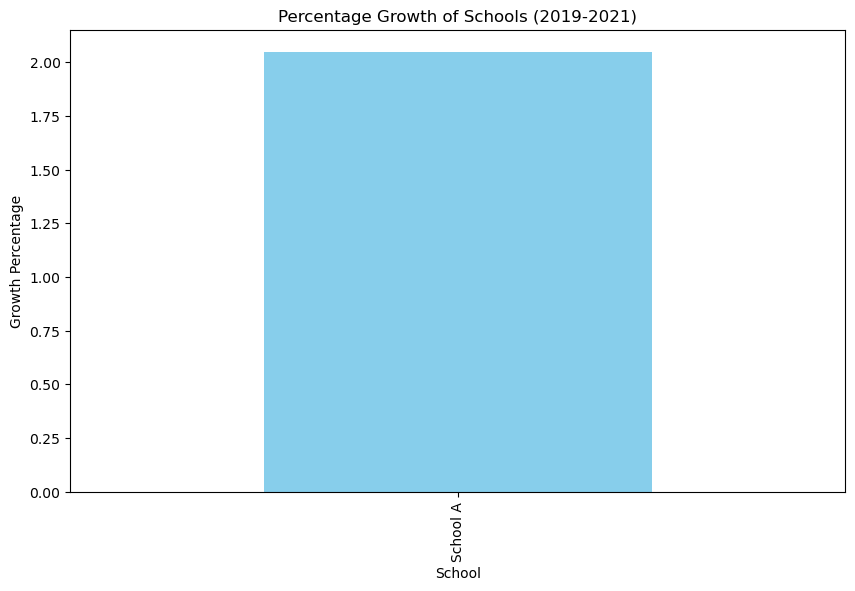

In [110]:
import matplotlib.pyplot as plt

# Plot the overall growth of schools
plt.figure(figsize=(10, 6))
growth_percentage.sort_values().plot(kind='bar', color='skyblue')
plt.title('Percentage Growth of Schools (2019-2021)')
plt.xlabel('School')
plt.ylabel('Growth Percentage')
plt.show()


Generate PowerPoint

In [115]:
from pptx import Presentation
from pptx.util import Inches
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [116]:
# Replace these paths with the actual file paths on your system
data_2019 = pd.read_excel('Bangalore Schools 2019.xlsx')
data_2020 = pd.read_excel('Bangalore Schools 2020.xlsx')
data_2021 = pd.read_excel('Bangalore Schools 2021.xlsx')


Step 1: Distribution of Marks in Each Subject

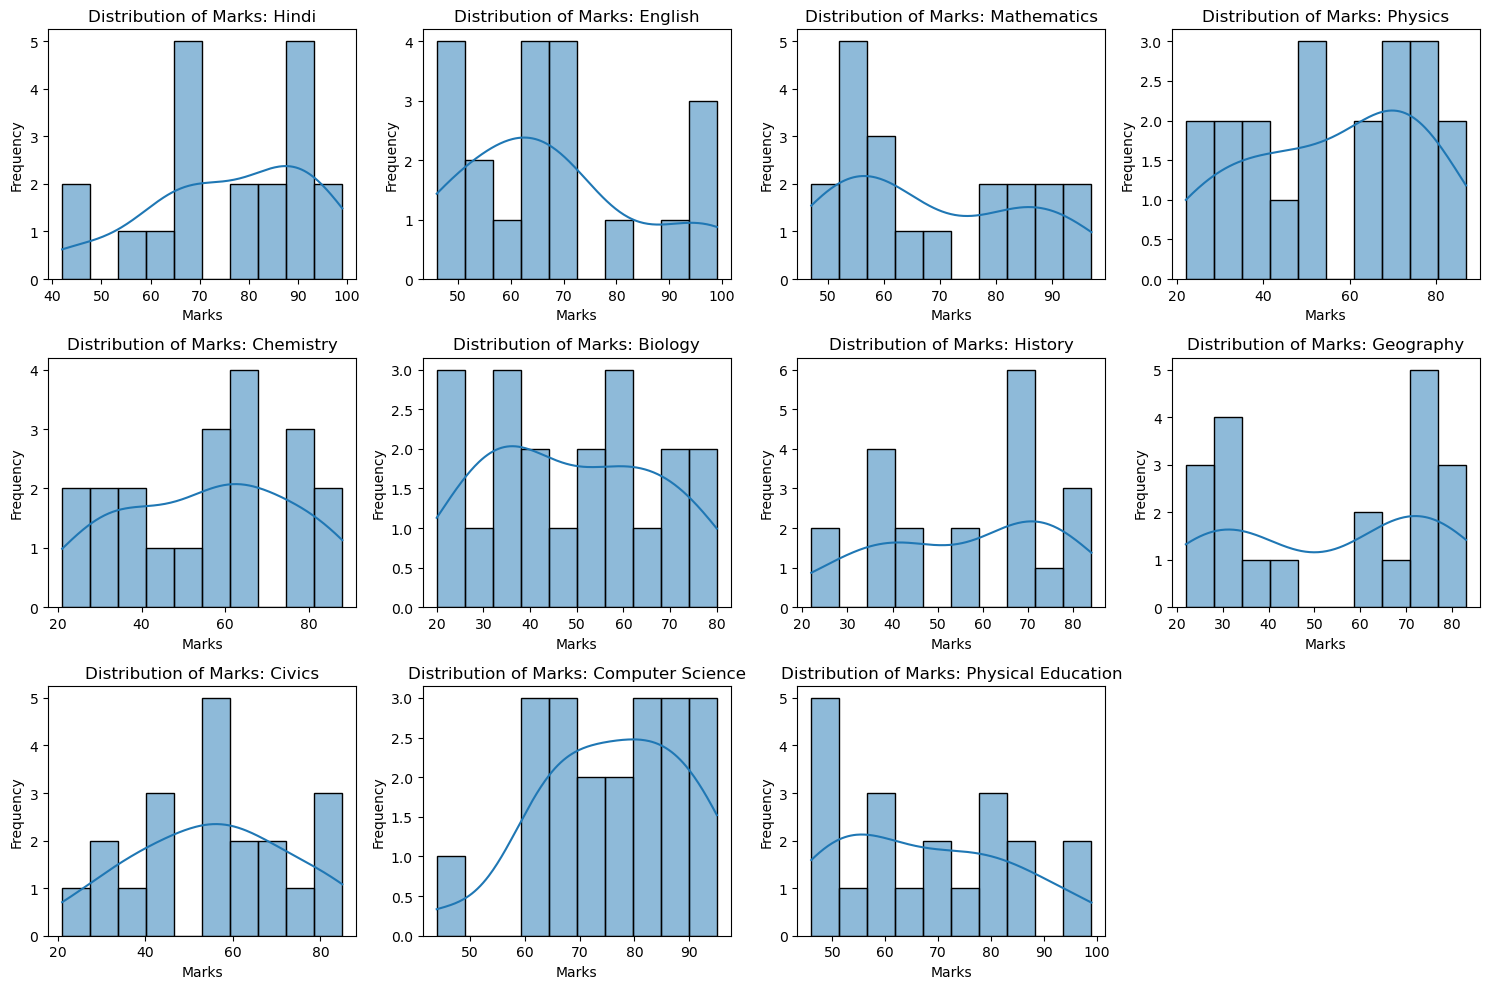

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of subject columns
subject_columns = ['Hindi', 'English', 'Mathematics', 'Physics', 'Chemistry', 'Biology', 
                   'History', 'Geography', 'Civics', 'Computer Science', 'Physical Education']

# Create a histogram for each subject
plt.figure(figsize=(15, 10))

for i, subject in enumerate(subject_columns, 1):
    plt.subplot(3, 4, i)  # 3 rows and 4 columns of subplots
    sns.histplot(data_2021[subject], bins=10, kde=True)
    plt.title(f'Distribution of Marks: {subject}')
    plt.xlabel('Marks')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Correlation Heatmap

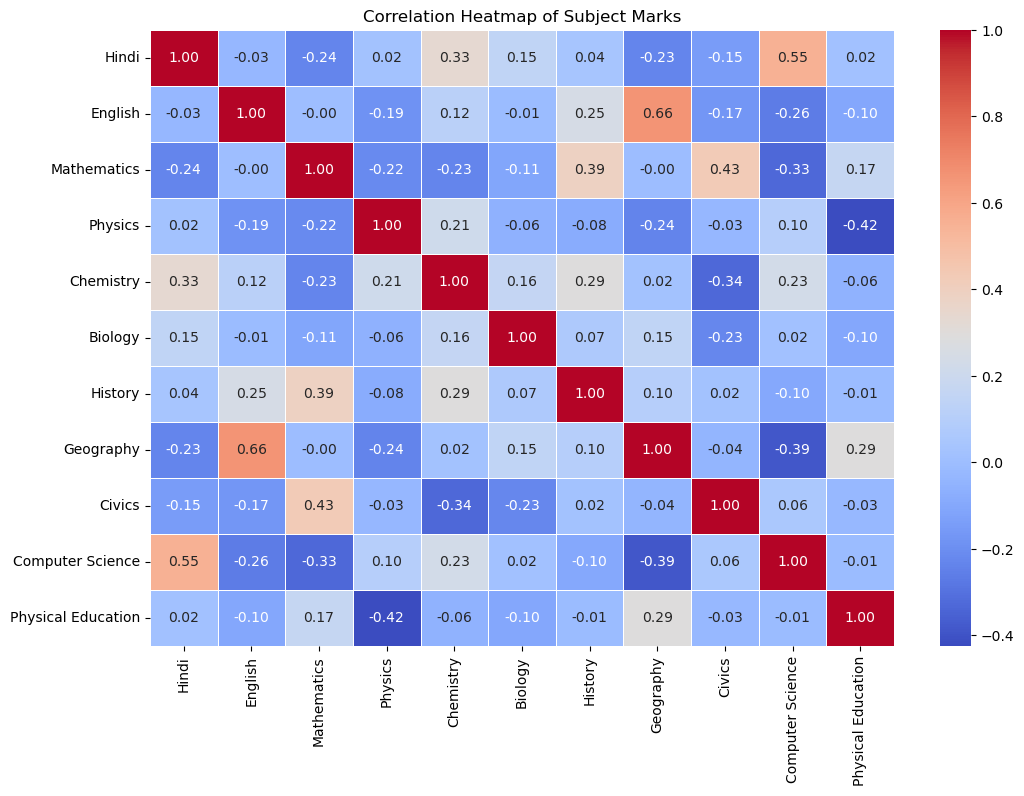

In [127]:
# Calculate the correlation matrix for the subject columns
correlation_matrix = data_2021[subject_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Subject Marks')
plt.show()


Box Plot for Performance Comparison Across Students

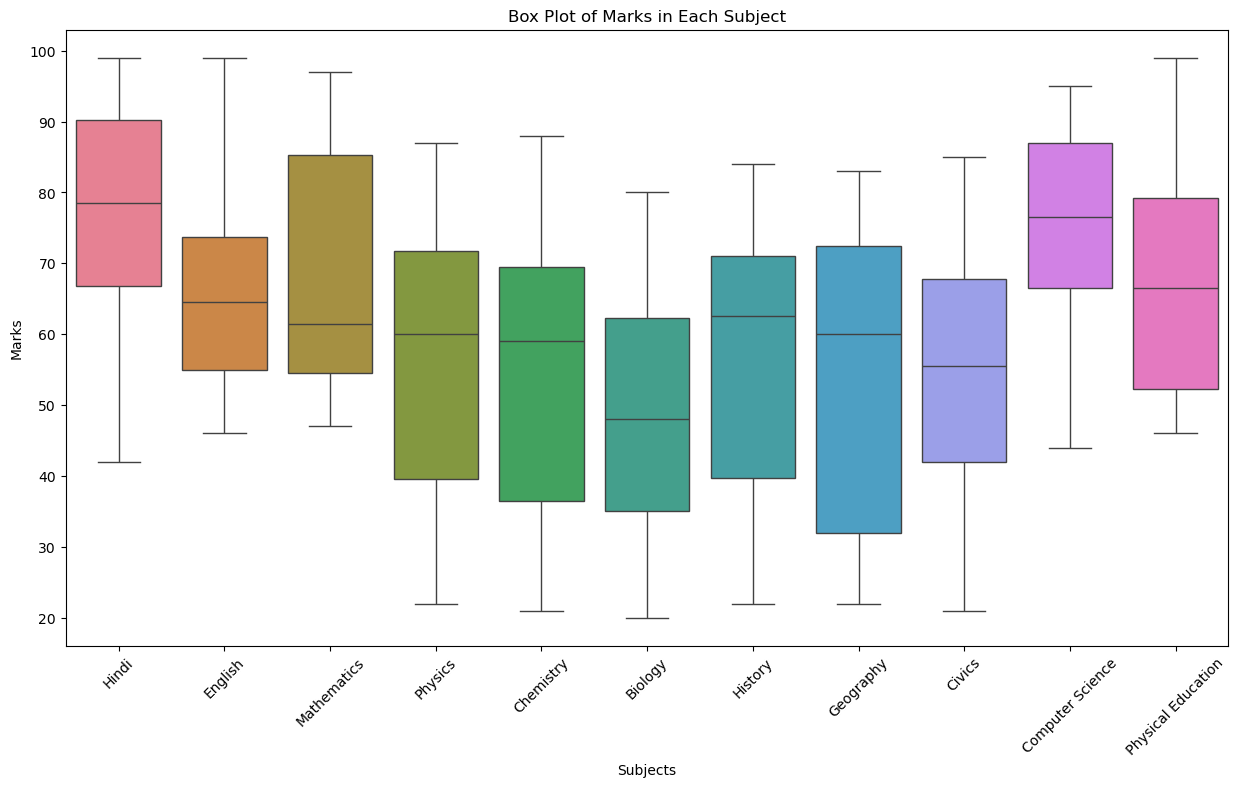

In [128]:
# Create a box plot for the marks in each subject
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_2021[subject_columns])
plt.title('Box Plot of Marks in Each Subject')
plt.xlabel('Subjects')
plt.ylabel('Marks')
plt.xticks(rotation=45)
plt.show()


Comparison of Marks in Two Subjects

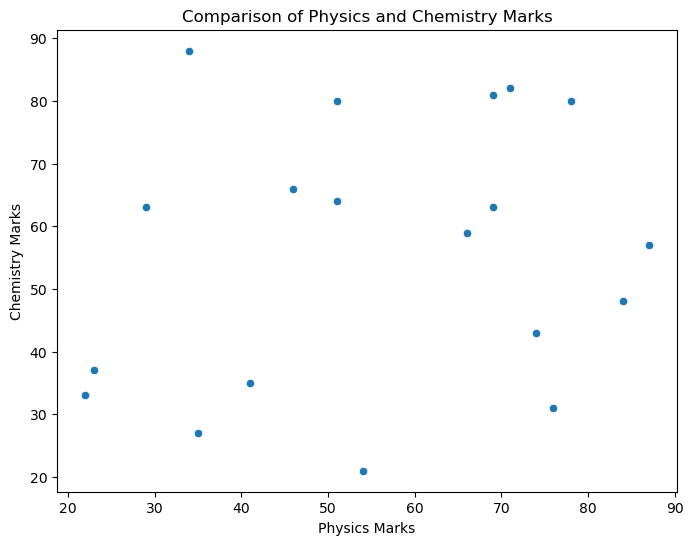

In [129]:
# Scatter plot comparing Physics and Chemistry marks
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Physics', y='Chemistry', data=data_2021)
plt.title('Comparison of Physics and Chemistry Marks')
plt.xlabel('Physics Marks')
plt.ylabel('Chemistry Marks')
plt.show()


Performance Distribution Over Time (Yearly Comparison)

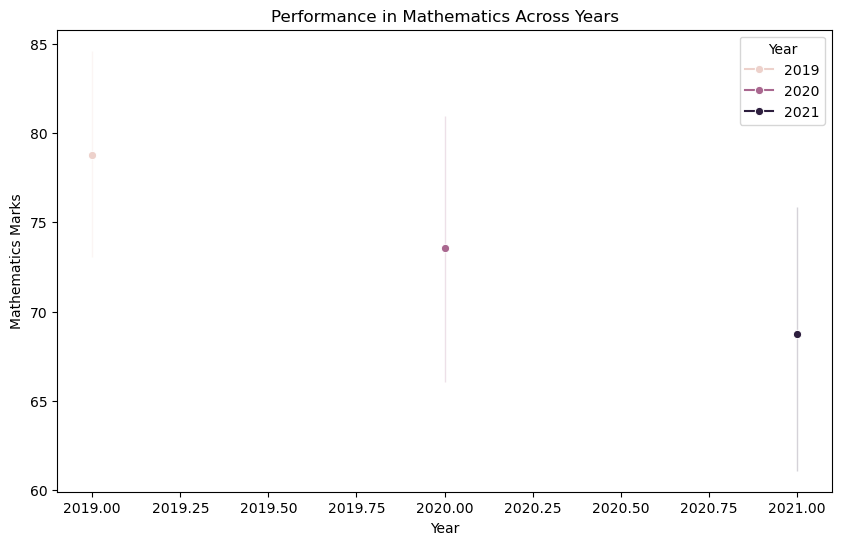

In [130]:
# Example of comparing performance in Mathematics over the years (assuming you have data for 2019, 2020, 2021)
data_2019['Year'] = 2019
data_2020['Year'] = 2020
data_2021['Year'] = 2021

# Combine the data for all years
combined_data = pd.concat([data_2019[['Student Roll', 'Mathematics', 'Year']],
                           data_2020[['Student Roll', 'Mathematics', 'Year']],
                           data_2021[['Student Roll', 'Mathematics', 'Year']]])

plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x='Year', y='Mathematics', marker='o', hue='Year')
plt.title('Performance in Mathematics Across Years')
plt.xlabel('Year')
plt.ylabel('Mathematics Marks')
plt.show()


Top 10 Students in a Specific Subject

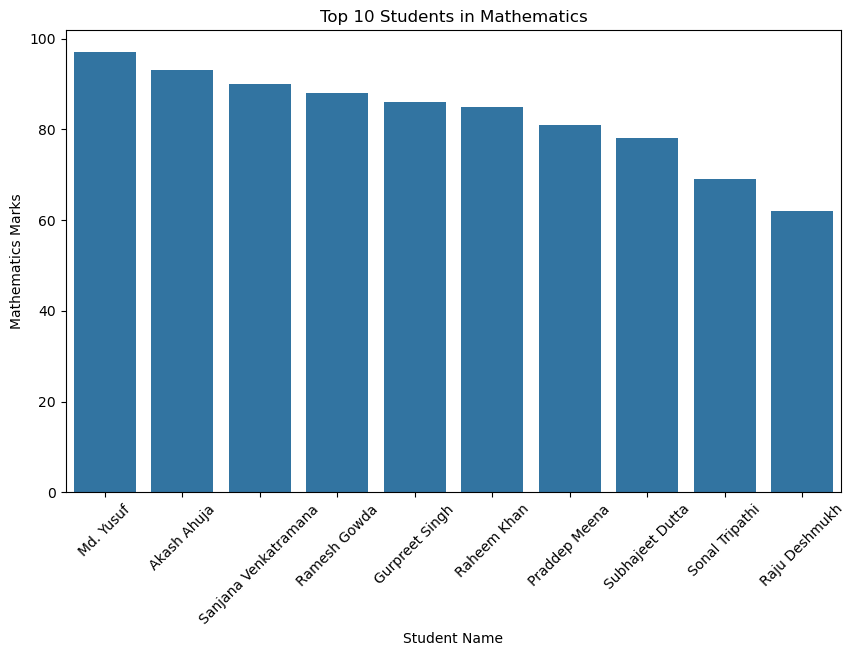

In [131]:
# Sort the students by Mathematics marks and get the top 10
top_10_math_students = data_2021[['Student Name', 'Mathematics']].sort_values(by='Mathematics', ascending=False).head(10)

# Create a bar plot for the top 10 students in Mathematics
plt.figure(figsize=(10, 6))
sns.barplot(x='Student Name', y='Mathematics', data=top_10_math_students)
plt.title('Top 10 Students in Mathematics')
plt.xlabel('Student Name')
plt.ylabel('Mathematics Marks')
plt.xticks(rotation=45)
plt.show()


Count of Students in Each Marks Category (Very Poor, Poor, Average, Good, Very Good)

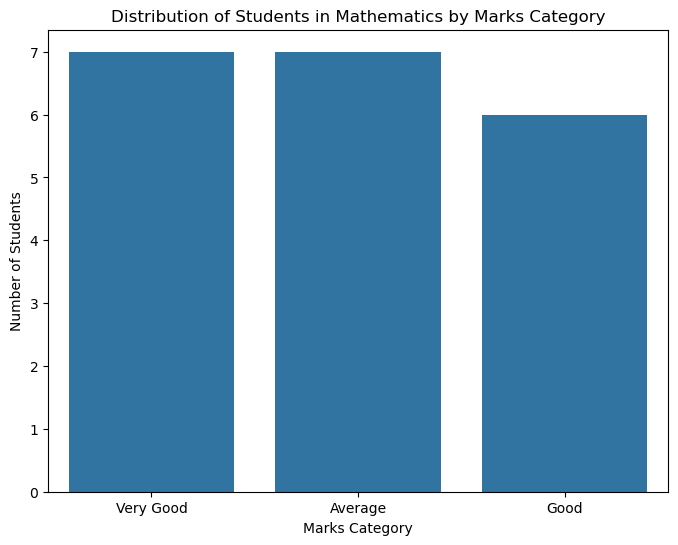

In [132]:
def categorize_marks(mark):
    if mark <= 20:
        return 'Very Poor'
    elif mark <= 40:
        return 'Poor'
    elif mark <= 60:
        return 'Average'
    elif mark <= 80:
        return 'Good'
    else:
        return 'Very Good'

# Apply the categorization to a specific subject, like Mathematics
data_2021['Math Category'] = data_2021['Mathematics'].apply(categorize_marks)

# Count the number of students in each category
category_counts = data_2021['Math Category'].value_counts()

# Create a bar plot for the count of students in each category
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Students in Mathematics by Marks Category')
plt.xlabel('Marks Category')
plt.ylabel('Number of Students')
plt.show()


 Count of Students by Subject (How many students passed/failed)

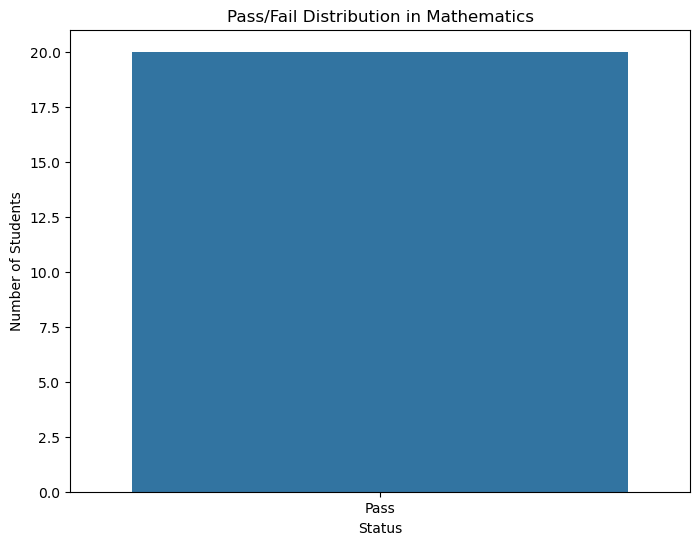

In [133]:
# Define a passing mark (e.g., 35 for passing)
passing_marks = 35

# Create a function to categorize as pass/fail
def pass_fail(mark):
    return 'Pass' if mark >= passing_marks else 'Fail'

# Apply pass/fail categorization to each subject
for subject in subject_columns:
    data_2021[f'{subject} Status'] = data_2021[subject].apply(pass_fail)

# Now let's count the number of passes and fails for a specific subject (e.g., Mathematics)
math_status_counts = data_2021['Mathematics Status'].value_counts()

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=math_status_counts.index, y=math_status_counts.values)
plt.title('Pass/Fail Distribution in Mathematics')
plt.xlabel('Status')
plt.ylabel('Number of Students')
plt.show()


Conclusion

The above visualizations provide insights into the distribution of marks across different subjects, comparisons between subjects, and overall student performance. 